# <center> 数据建模作业8：岭回归与LASSO回归 </center>
<center>姓名：李先洋 学号：M201970007</center>

## 1.	描述性统计与分析
读入数据，对所有变量进行描述性统计，并画出所有变量的箱线图。

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import itertools
data = pd.read_excel('data.xlsm')
data = data.iloc[:, 2:]
data.describe()


,y,x1,x2,x3,x4,x5
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,26.444000,101.032000,99.384000,5197.400000,11.400000,11.848000
std,24.603084,64.960467,63.283382,3649.682155,7.112196,7.625676
min,1.900000,13.200000,6.100000,209.000000,2.000000,2.500000
25%,8.600000,60.900000,51.100000,3275.000000,7.000000,6.500000
50%,18.500000,84.000000,105.300000,4161.000000,10.000000,11.000000
75%,46.200000,142.800000,129.800000,6109.000000,14.000000,16.000000
max,84.700000,299.500000,277.000000,15571.000000,34.000000,33.700000


每一个变量的均值、方差差异都很明显。尤其是x3 变量，均值方差与其他变量有较大的差别，所以先对所有变量进行归一化。

In [2]:
data = (data-data.mean())/(data.std())#做归一化处理

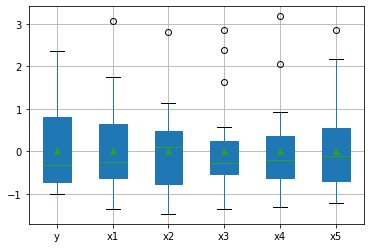

In [3]:
f = data.boxplot(sym = 'o',  # 异常点形状，参考marker
               vert = True,  # 是否垂直
               whis = 1.5,  # IQR，默认1.5，也可以设置区间比如[5,95]，代表强制上下边缘为数据95%和5%位置
               patch_artist = True,  # 上下四分位框内是否填充，True为填充
               meanline = False,showmeans=True,  # 是否有均值线及其形状
               showbox = True,  # 是否显示箱线
               showcaps = True,  # 是否显示边缘线
               showfliers = True,  # 是否显示异常值
               notch = False,  # 中间箱体是否缺口
               return_type='dict'  # 返回类型为字典
              ) 

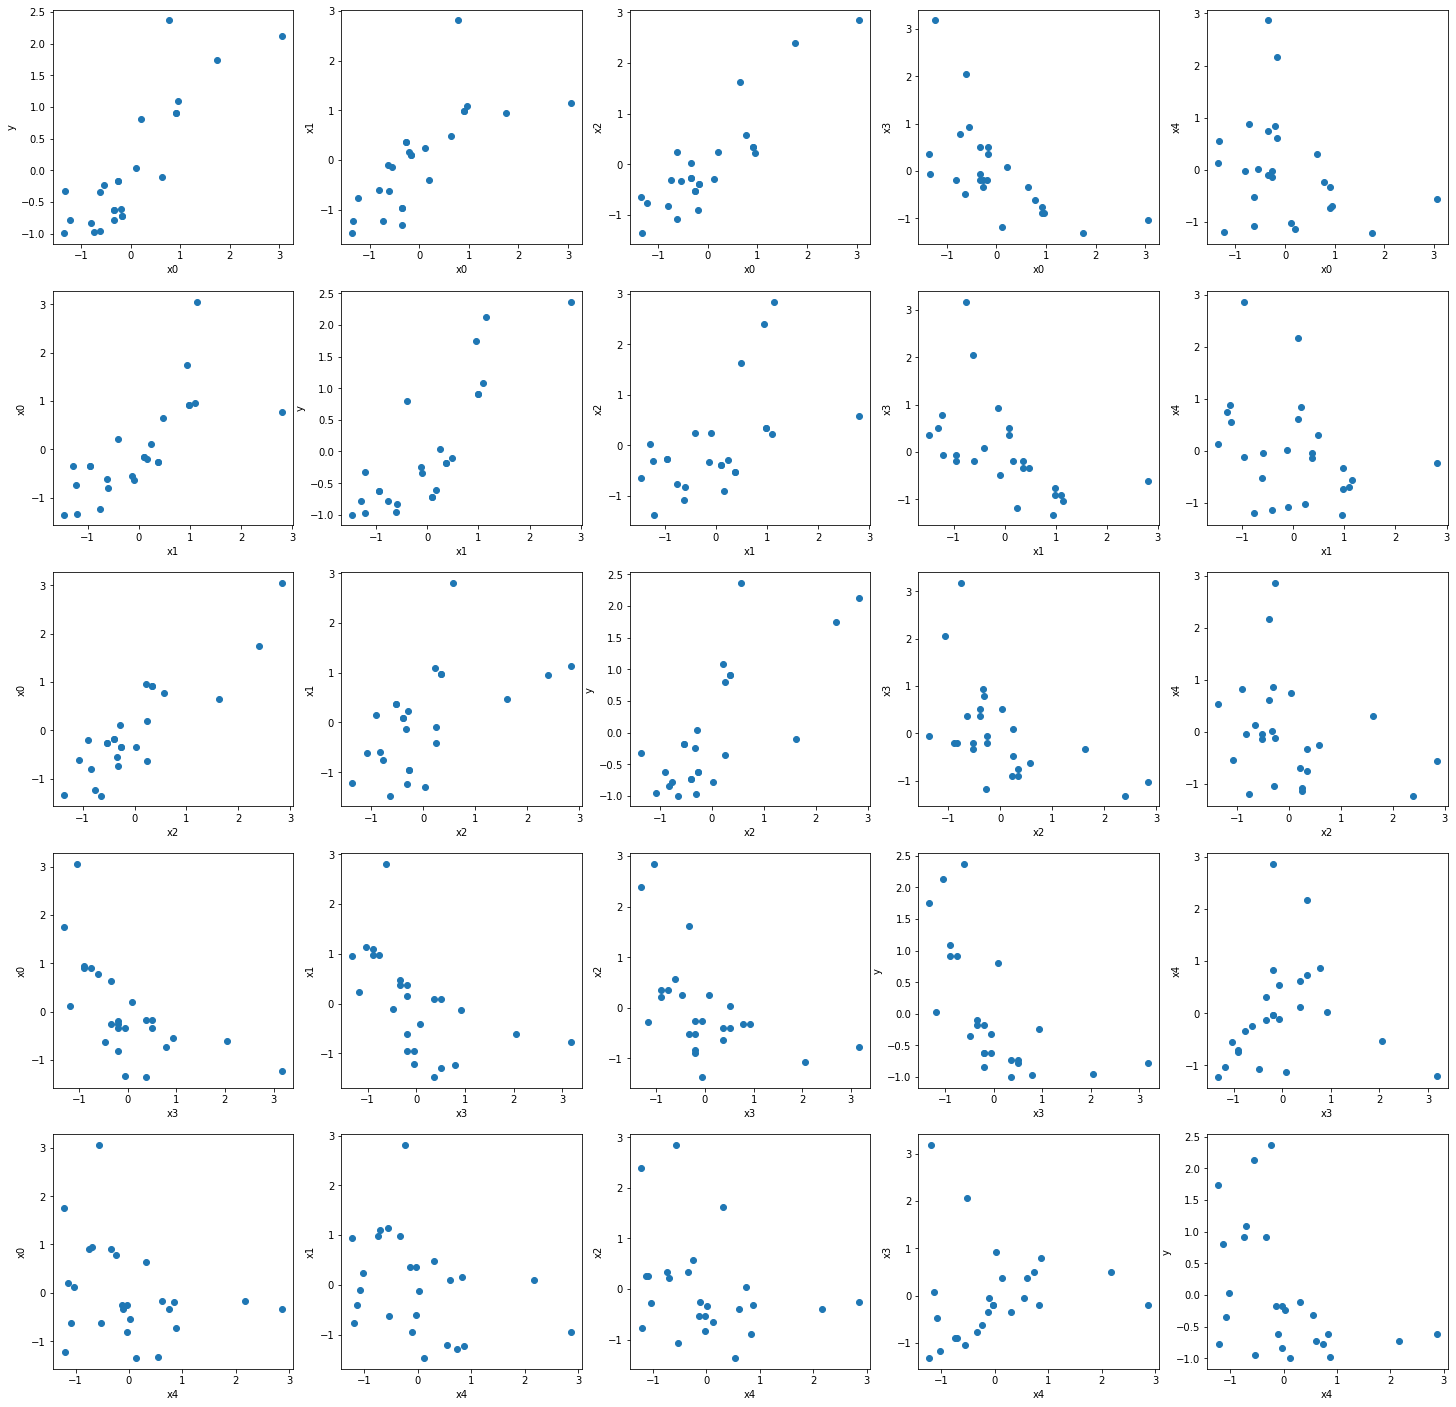

In [4]:
x=data.iloc[:, 1:]
y=data.iloc[:, 0]
plt.figure(figsize=(25,25))
for i in range(5):
    for j in range(5):
        plt.subplot(5,5,1+ i * 5 + j)
        if i!=j:
            plt.scatter(x.iloc[:, i],x.iloc[:, j])
            plt.xlabel(f'x{i}')
            plt.ylabel(f'x{j}')
        else:
            plt.scatter(x.iloc[:, i],y)
            plt.xlabel(f'x{i}')
            plt.ylabel('y')
plt.show()

对角线上的图为各个自变量与因变量之间的散点图，其余的图为各个自变量之间的散点图。可以看出自变量之间具有一定的线性相关性。

## 2.回归建模

分别使用使用岭回归和lasso回归，对数据进行拟合，均使用交叉验证的方法确定参数阿尔法（课堂上，这个参数称为lameda）。

In [5]:
from sklearn.linear_model import LassoLarsCV ,RidgeCV ,LassoLars,Ridge
model = RidgeCV()
model.fit(x, y)   # 线性回归建模
print('最佳的alpha：',model.alpha_)  
print('系数矩阵:\n',model.coef_)
print('线性回归模型:\n',model)
predicted1 = model.predict(x)

最佳的alpha： 10.0
系数矩阵:
 [ 0.24739781  0.30985411  0.16935344 -0.12723439 -0.15304494]
线性回归模型:
 RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)


In [6]:
model = LassoLarsCV()  # LassoLarsCV自动调节alpha可以实现选择最佳的alpha
# model = LassoLars(0.5) 
model.fit(x, y)   # 线性回归建模
print('最佳的alpha：',model.alpha_)  

print('系数矩阵:\n',model.coef_)
print('线性回归模型:\n',model)
# 使用模型预测
predicted2 = model.predict(x)


最佳的alpha： 0.0015604180016262625
系数矩阵:
 [ 0.34014739  0.4098367   0.10819251 -0.09082205 -0.17207304]
线性回归模型:
 LassoLarsCV(copy_X=True, cv=None, eps=2.220446049250313e-16, fit_intercept=True,
            max_iter=500, max_n_alphas=1000, n_jobs=None, normalize=True,
            positive=False, precompute='auto', verbose=False)


从系数矩阵来看,两种回归算法均学习到了，前面三个自变量与因变量呈正相关，后面两个呈负相关，与上图可视化效果一致。  
不同的是，通过交叉验证得到的参数alpha，有较大的不同。岭回归为10，lasso回归为0.0015。  
强制将lasso回归的参数设置为0.1时，得到的系数矩阵如下：

In [7]:
# model = LassoLarsCV()  # LassoLarsCV自动调节alpha可以实现选择最佳的alpha
model = LassoLars(0.1) 
model.fit(x, y)   # 线性回归建模
print('系数矩阵:\n',model.coef_)
print('线性回归模型:\n',model)
# 使用模型预测
predicted3 = model.predict(x)


系数矩阵:
 [0.22377761 0.15774107 0.         0.         0.        ]
线性回归模型:
 LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)


后面三个变量系数均为0，可以得出在本次实验数据中前两个自变量与因变量的相关性较强。

最后可视化以上三个模型，在训练集上的拟合情况，如下图：

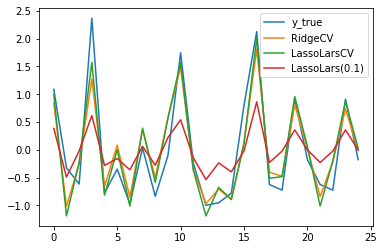

In [8]:
plt.plot(y)
plt.plot(predicted1)
plt.plot(predicted2)
plt.plot(predicted3)
plt.legend(['y_true','RidgeCV','LassoLarsCV','LassoLars(0.1)'])